In [1]:
# In this exercise, we want to compare between top 10 most demand skills and top 10 most paid skills for Data Analyst.

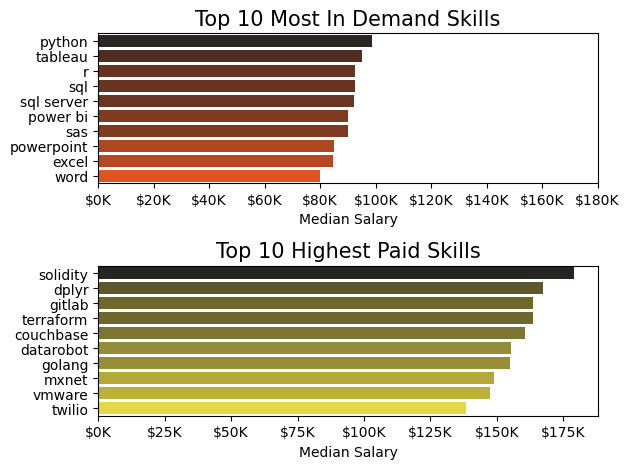

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset 

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df = df.drop_duplicates().copy()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

df_og = df.copy()

df = df[df['job_title_short'] == 'Data Analyst']
df = df.dropna(subset = ['job_skills', 'salary_year_avg'])

df_clean_og = df.copy()

import ast 
df['job_skills'] = df.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df_ex = df.explode('job_skills')

df_gb = df_ex.groupby(by = 'job_skills').agg(demand = ('job_skills', 'size'), median_sal = ('salary_year_avg', 'median'))
df_gb['median_sal'] = df_gb.median_sal.apply(lambda sal : round(sal, 2))

df_gb1 = df_gb.sort_values(by = 'demand', ascending = False).head(10).sort_values(by = 'median_sal', ascending = False)

df_gb2 = df_gb.sort_values(by = 'median_sal', ascending = False).drop('svn').head(10)

fig, ax = plt.subplots(2,1)

sns.barplot(data = df_gb1, x = "median_sal", y = df_gb1.index, ax = ax[0], hue = "median_sal", palette = "dark:#FF4500_r")
ax[0].set_xlabel("Median Salary", fontsize = 10)
ax[0].set_ylabel("")
ax[0].set_title("Top 10 Most In Demand Skills", fontsize = 15)
ax[0].legend().remove()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))
ax[0].set_xlim(0,180000)

sns.barplot(data = df_gb2, x = "median_sal", y = df_gb2.index, ax = ax[1], hue = "median_sal", palette = "dark:#FFED29_r")
ax[1].set_xlabel("Median Salary", fontsize = 10)
ax[1].set_ylabel("")
ax[1].set_title("Top 10 Highest Paid Skills", fontsize = 15)
ax[1].legend().remove()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))

fig.tight_layout()